In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
from IPython.display import display, Image

In [6]:
labels = os.listdir('./fruit_data/train/')
labels

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']


 FRESHAPPLES


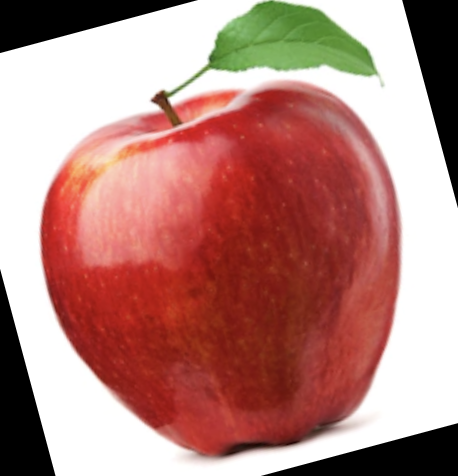

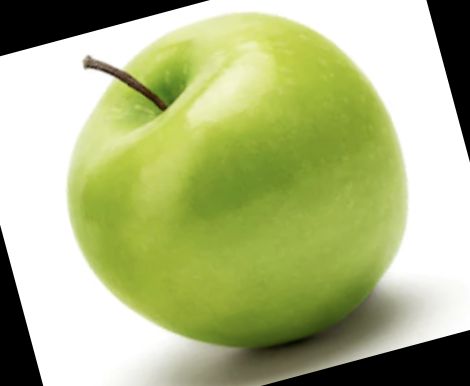

there are  1693  images in  freshapples class

 FRESHBANANA


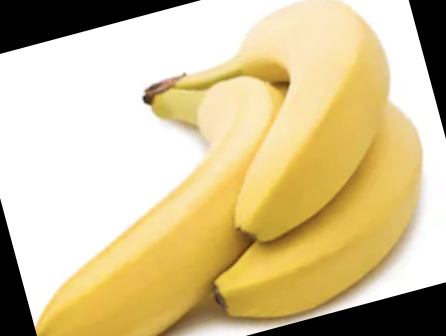

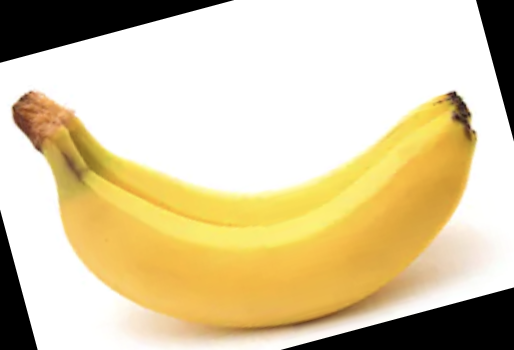

there are  1581  images in  freshbanana class

 FRESHORANGES


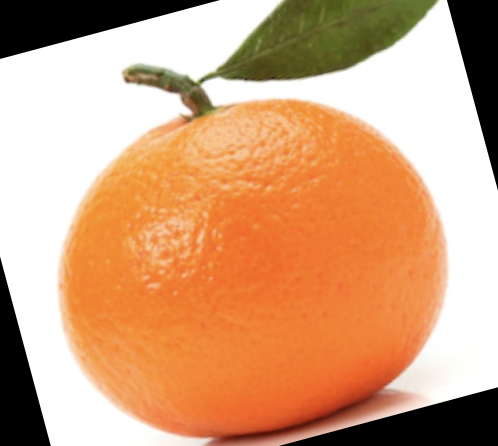

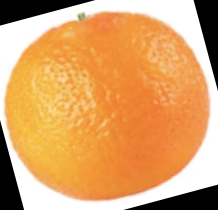

there are  1466  images in  freshoranges class

 ROTTENAPPLES


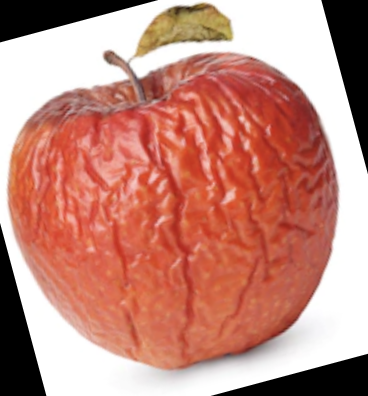

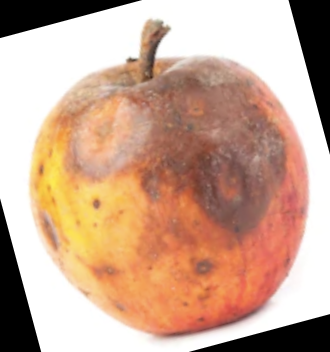

there are  2342  images in  rottenapples class

 ROTTENBANANA


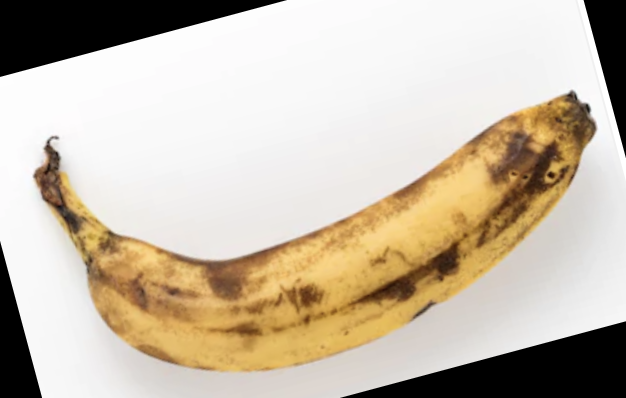

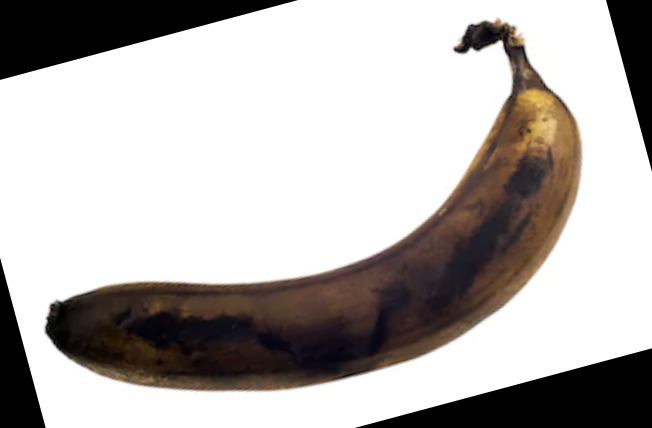

there are  2224  images in  rottenbanana class

 ROTTENORANGES


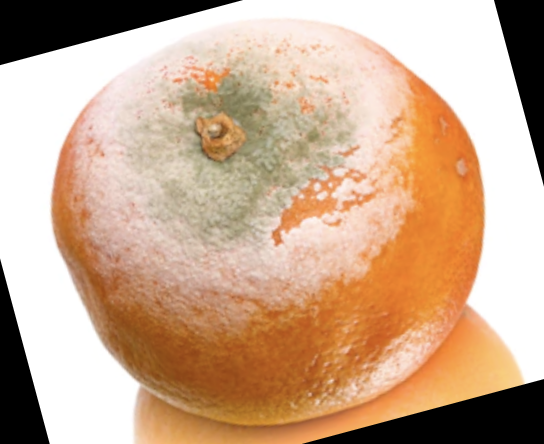

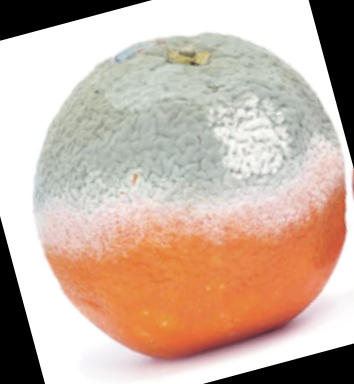

there are  1595  images in  rottenoranges class


In [7]:
num = []

for i in labels:
  path = './fruit_data/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='./fruit_data/train/', 
                                 target_size=(20,20), classes=labels, 
                                 batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='./fruit_data/train/', 
                                 target_size=(20,20), classes=labels, 
                                 batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


In [12]:
# building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

Epoch 1/8
349/349 [==============================] - 38s 109ms/step - loss: 0.8047 - accuracy: 0.6961 - val_loss: 0.4094 - val_accuracy: 0.8618
Epoch 2/8
349/349 [==============================] - 36s 103ms/step - loss: 0.4161 - accuracy: 0.8559 - val_loss: 0.3090 - val_accuracy: 0.8912
Epoch 3/8
349/349 [==============================] - 36s 102ms/step - loss: 0.3271 - accuracy: 0.8842 - val_loss: 0.3118 - val_accuracy: 0.8861
Epoch 4/8
349/349 [==============================] - 35s 102ms/step - loss: 0.2773 - accuracy: 0.9006 - val_loss: 0.2305 - val_accuracy: 0.9256
Epoch 5/8
349/349 [==============================] - 36s 103ms/step - loss: 0.2399 - accuracy: 0.9117 - val_loss: 0.1782 - val_accuracy: 0.9371
Epoch 6/8
349/349 [==============================] - 35s 101ms/step - loss: 0.1931 - accuracy: 0.9297 - val_loss: 0.1679 - val_accuracy: 0.9343
Epoch 7/8
349/349 [==============================] - 35s 101ms/step - loss: 0.1710 - accuracy: 0.9382 - val_loss: 0.1698 - val_accuracy:

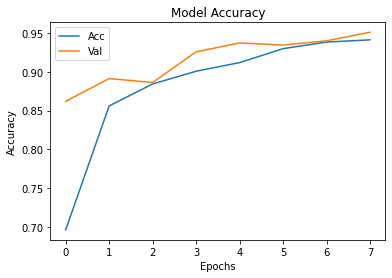

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

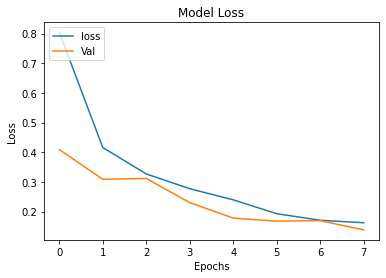

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [17]:
export_dir = './saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./saved_model/1\assets


In [21]:
model.save('model.h5')